Author: Cyrille Mesue N.


![dphi banner](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/dphi_banner.png)

# Loading Libraries


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [11]:
print(sns.__version__)

0.11.2


# Loading Dataset
Pandas module is used for reading files.

You can learn more about pandas [here](https://dphi.tech/learn/introduction-to-pandas)

In [2]:
df = pd.read_csv(r"train_dataset.csv")

## What do you need to do now?
*  Perform EDA and Data Visualization, to understand the data. Learn more about EDA [here](https://dphi.tech/learn/introduction-to-exploratory-data-analysis). Learn more about data visualization [here](https://dphi.tech/learn/introduction-to-data-visualization)
*  Clean the data if required (like removing or filling missing values, treat outliers, etc.). Learn more about handling missing values [here](https://youtu.be/EaGbS7eWSs0)
*  Perform Data Preprocessing if you feel it's required. Learn one hot encoding [here](https://youtu.be/9yl6-HEY7_s).

# **Basic EDA**

In [3]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [4]:
df.shape

(38984, 23)

##### Observations
The training dataset contains 38984 samples and 23 features. 

In [5]:
status_yes = df[df["smoking"]==1]
status_yes.describe()
#status_yes dataframe stores all the records where smoking status is 1


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.00000,14318.000000,14318.000000,...,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.0
mean,41.494971,169.444406,71.005727,84.796368,1.053827,1.050629,1.020813,1.02221,122.732295,77.308563,...,53.849071,112.738511,15.449176,1.093728,0.947556,27.779648,31.197723,55.576617,0.272384,1.0
std,11.381107,6.772144,12.097303,8.764296,0.475138,0.461258,0.142763,0.14737,13.067100,9.449752,...,13.707266,45.289706,1.126675,0.422049,0.186311,20.125290,30.521702,64.275746,0.445202,0.0
min,20.000000,140.000000,35.000000,51.000000,0.100000,0.100000,1.000000,1.00000,71.000000,46.000000,...,4.000000,1.000000,8.300000,1.000000,0.100000,8.000000,3.000000,7.000000,0.000000,1.0
25%,35.000000,165.000000,65.000000,79.000000,0.800000,0.800000,1.000000,1.00000,114.000000,70.000000,...,44.000000,89.000000,14.800000,1.000000,0.800000,20.000000,17.000000,24.000000,0.000000,1.0
50%,40.000000,170.000000,70.000000,84.300000,1.000000,1.000000,1.000000,1.00000,122.000000,78.000000,...,52.000000,111.000000,15.500000,1.000000,0.900000,24.000000,24.000000,37.000000,0.000000,1.0
75%,50.000000,175.000000,80.000000,90.000000,1.200000,1.200000,1.000000,1.00000,130.000000,83.000000,...,61.000000,134.000000,16.200000,1.000000,1.100000,30.000000,36.000000,62.000000,1.000000,1.0
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.00000,233.000000,146.000000,...,159.000000,1860.000000,21.100000,6.000000,9.900000,981.000000,1783.000000,999.000000,1.000000,1.0


In [6]:
status_no = df[df["smoking"]==0]
status_no.describe()
#status_no dataframe stores all the records where smoking status is 0

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,24666.000000,24666.000000,24666.000000,24666.000000,24666.000000,24666.000000,24666.000000,24666.000000,24666.000000,24666.000000,...,24666.000000,24666.000000,24666.000000,24666.000000,24666.000000,24666.000000,24666.000000,24666.000000,24666.000000,24666.0
mean,45.655761,161.929376,62.997446,80.474949,0.992390,0.984468,1.028014,1.028501,120.746169,75.231574,...,59.292346,116.441539,14.145423,1.082340,0.850316,25.280264,24.792792,30.808076,0.180775,0.0
std,12.184586,9.276112,12.424528,9.275802,0.510267,0.510197,0.165017,0.166402,13.915510,9.696826,...,14.757293,41.362246,1.586635,0.390011,0.230884,18.540739,31.521032,35.771370,0.384840,0.0
min,20.000000,130.000000,30.000000,54.000000,0.100000,0.100000,1.000000,1.000000,72.000000,40.000000,...,22.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.0
25%,40.000000,155.000000,55.000000,74.000000,0.800000,0.800000,1.000000,1.000000,110.000000,69.000000,...,49.000000,93.000000,13.100000,1.000000,0.700000,19.000000,14.000000,15.000000,0.000000,0.0
50%,45.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,120.000000,75.000000,...,58.000000,114.000000,14.200000,1.000000,0.800000,22.000000,19.000000,21.000000,0.000000,0.0
75%,55.000000,170.000000,70.000000,86.500000,1.200000,1.200000,1.000000,1.000000,130.000000,81.000000,...,68.000000,136.000000,15.300000,1.000000,1.000000,28.000000,28.000000,33.000000,0.000000,0.0
max,85.000000,190.000000,130.000000,128.000000,9.900000,9.900000,2.000000,2.000000,223.000000,137.000000,...,359.000000,1660.000000,19.600000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,0.0


In [7]:
mean_yes = status_yes.describe().loc["mean"]
mean_no = status_no.describe().loc["mean"]
mean_yes_df = pd.DataFrame(mean_yes).rename(columns={"mean":"mean_yes"})
mean_no_df = pd.DataFrame(mean_no).rename(columns={"mean":"mean_no"})
compare_means = pd.concat([mean_yes_df,mean_no_df], axis = 1)
compare_means 


,mean_yes,mean_no
age,41.494971,45.655761
height(cm),169.444406,161.929376
weight(kg),71.005727,62.997446
waist(cm),84.796368,80.474949
eyesight(left),1.053827,0.992390
eyesight(right),1.050629,0.984468
hearing(left),1.020813,1.028014
hearing(right),1.022210,1.028501
systolic,122.732295,120.746169
relaxation,77.308563,75.231574


<AxesSubplot:>

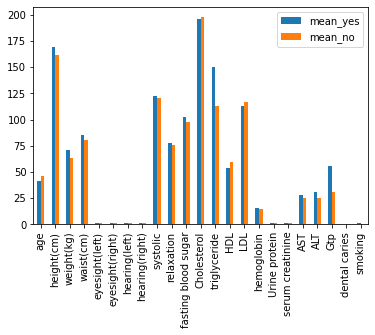

In [8]:
compare_means.plot.bar()

##### Observation
* The mean across the two classes varies significant across some columns but very little on some columns. 
* Low variance features will be removed as they may contribute to model bias

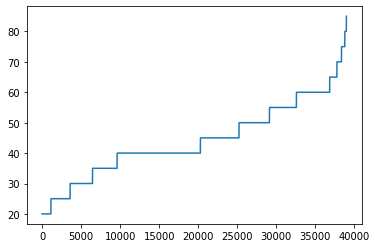

In [9]:
x = df.age
plt.plot(sorted(x))

##### Observation
* The Data was selected in a non-linear fashion by age

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

##### Observation
* All columns contain continuous flaoting point numbers (numerical) 
* All features may be used for machine learning

In [11]:
###PAIRPLOTS
#sns.set_style("whitegrid")
#sns.pairplot(df, hue="smoking", height = 5)
#plt.show()

In [12]:
df.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

##### Observation
* There are no missing data values

In [13]:
df["smoking"].value_counts()

0    24666
1    14318
Name: smoking, dtype: int64

<AxesSubplot:>

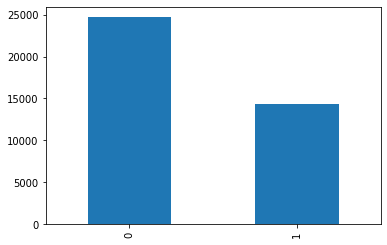

In [14]:
# categorical variable
df["smoking"].value_counts().plot(kind = "bar")

##### Observation
* Data is not Balanced
* There are more smoking status than non-smoking status
* class imbalance will be handled. 
* Class weighting will be applied

# Separating Input Features and Output Features
Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we want to predict whether the meteor is a threat to the Earth or not, so the variable **Hazardous** is our target variable and remaining features are input variable.

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [15]:
X = df.drop('smoking', axis = 1)   # here we are dropping the Target feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'
y = df['smoking']             # Output/Dependent variable

# Splitting the data into Train and Test Set
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.


In [16]:
def transform_data(X, y = None):
    """
    function helps to transform data into a form that Pipeline takes
    """
    X = pd.DataFrame(X)
    new_X = []
    new_y = []
    for i in range(len(X)):
        data = {}
        for key in X.columns:
            data[key] = X[key].iloc[i]
        new_X.append(data)

    # transform y if y is given
    if type(y) != type(None):
        for i in range(len(y)):
            if y[i] == 0:
                new_y.append("no")
            else:
                new_y.append("yes")
            
    return new_X, new_y



In [17]:
#train test split. Its not necessary to keep a large percentage for 
#testing since cross validation will be used to evaluate model
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.1)

X_temp = X_train
y_temp = y_train

X_train, y_train = transform_data(X_temp, y_temp)
X_test, y_test = transform_data(X_test, y_test)

# Building Model
Now we are finally ready, and we can train the model.

* Train a baseline model: Random Forest 
* Find Class weights
* We will try several machine learning models and select the best
* Next we will try several feature selection technique using the best model and select the best feature selection method
* Next we will optimize model through hyper parameter tunning using grid search
* Next we will test model our kept test set
* Use model to make predictions

### Train BaseLine model

In [18]:
# Build pipeline and test a support vector classifier with no PCA
from sklearn.ensemble import RandomForestClassifier
from time import time
start = time()
model = Pipeline([
            ('vect', DictVectorizer(sparse=False)),
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(random_state = 42))
        ])

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Score : ",score)

stop = time()

print(stop - start, " secs")

Score :  0.8061041292639138
7.376790523529053  secs


In [19]:
# Build pipeline and test a support vector classifier with no PCA
model = Pipeline([
            ('vect', DictVectorizer(sparse=False)),
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(random_state = 42))
        ])
# 10-fold cross validation Can play with n_splits parameter
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Print output
scores = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=None, scoring='f1_micro')
print(f'K-Fold test: {scores}')
print(f'Mean: {scores.mean().round(3)}')
print(f'Std: {scores.std().round(3)}')


K-Fold test: [0.79880308 0.80849245 0.80022799 0.80222286 0.79424337 0.79732041
 0.81299886 0.80872292 0.79732041 0.80188141]
Mean: 0.802
Std: 0.006


Model generalizes fairly well with standard deviaiton of 0.6%. 

### Find Class Weights

In [20]:
# The non-smoking class is approximately double the smoking class. 
# Therefore we can penalize the smoking class twice
class_weight = {"no":1, "yes": 2}

In [21]:
# Build pipeline and test a support vector classifier with no PCA
from sklearn.ensemble import RandomForestClassifier
model = Pipeline([
            ('vect', DictVectorizer(sparse=False)),
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(class_weight = class_weight, random_state = 42))
        ])

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.8099512695562965

Class weighting slightly increased results

### DownSampling

In [22]:
from sklearn.utils import resample
# The non-smoking class is reduced to match the number of samples in the smoking class
df_0 = df[df["smoking"] == 0]
df_1 = df[df["smoking"] == 1]

df_0_downsample = resample(df_0,
             replace=True,
             n_samples=len(df_1),
             random_state=42)

new_df = pd.concat([df_0_downsample, df_1], axis = 0).reset_index().drop(columns = ["index"])

<AxesSubplot:>

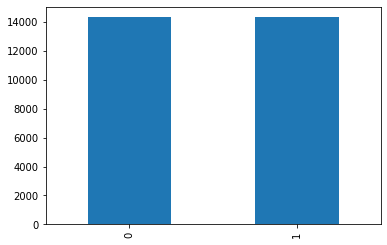

In [23]:
# 
new_df["smoking"].value_counts().plot(kind = "bar")

In [24]:
X = new_df.drop('smoking', axis = 1)   # here we are dropping the Target feature as this is the target and 'X' is input features, the changes are not                                              # made inplace as we have not used 'inplace = True'
y = new_df['smoking']             # Output/Dependent variable

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.1)
X_temp = X_train
y_temp = y_train

X_train, y_train = transform_data(X_temp, y_temp)
X_test, y_test = transform_data(X_test, y_test)

In [25]:
print("Train",len(X_train))
print("Test",len(X_test))

Train 25772
Test 2864


In [26]:
model = Pipeline([
            ('vect', DictVectorizer(sparse=False)),
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(random_state = 42))
        ])
# 10-fold cross validation Can play with n_splits parameter
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Print output
scores = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=None, scoring='f1_micro')
print(f'K-Fold test: {scores}')
print(f'Mean: {scores.mean().round(3)}')
print(f'Std: {scores.std().round(3)}')

K-Fold test: [0.84096199 0.8386346  0.8451688  0.84904928 0.83934808 0.85758634
 0.84710904 0.84827319 0.83973613 0.8451688 ]
Mean: 0.845
Std: 0.006


In [27]:
## Training model on 
model = Pipeline([
            ('vect', DictVectorizer(sparse=False)),
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(random_state = 42))
        ])

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Score : ",score)

Score :  0.8652234636871509


##### Observations
* Downsampling grately improved model performance

### Model  Selection
Many classifiers are tried. This section will take several minutes
from getModel import get_modelK-fold cross validation is performed to accurately select the best model from the list of classifiers

In [28]:
from getModel import get_model
start = time()
classifiers = ["RandomForestClassifier","XGBClassifier","GradientBoostingClassifier", "KNeighborsClassifier", "MLPClassifier","LogisticRegression", 
               "SGDClassifier","AdaBoostClassifier","VotingClassifier", "SVC"]

best_model = ""
best_score = 0

#model performance report


for classifier in classifiers:
    model = get_model(classifier)
    
    # XGBClassifier behaves differently with Pipeline
    
    if classifier == "XGBClassifier":
        
        pipeline = Pipeline([
                    #('vect', DictVectorizer(sparse=False)),
                    ('scaler', StandardScaler()),
                    ('clf', model)
                ])
        X_data, y_data = X_temp, y_temp
        
    else:
        pipeline = Pipeline([
                    ('vect', DictVectorizer(sparse=False)),
                    ('scaler', StandardScaler()),
                    ('clf', model)
                ])
        X_data, y_data = X_train, y_train
    # 10-fold cross validation Can play with n_splits parameter
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Print output
    scores = cross_val_score(pipeline, X_data, y_data, cv=kf, n_jobs=None, scoring='f1_micro')
    print("{} mean score of {}".format(classifier, scores.mean().round(3)))
    
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_model = classifier
        
print("Best Model is {} with a mean score of {}".format(best_model, best_score))

stop = time()

print(stop - start, " secs exec time")

RandomForestClassifier mean score of 0.845
XGBClassifier mean score of 0.793
GradientBoostingClassifier mean score of 0.755
KNeighborsClassifier mean score of 0.727
MLPClassifier mean score of 0.754
LogisticRegression mean score of 0.73
SGDClassifier mean score of 0.732
AdaBoostClassifier mean score of 0.747
VotingClassifier mean score of 0.777
SVC mean score of 0.755
Best Model is RandomForestClassifier with a mean score of 0.8451036245018819
3272.416741132736  secs exec time


### Model Optimization

In [29]:
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [100,300, 500]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [30,90,None]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
print(random_grid)

{'n_estimators': [100, 300, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [30, 90, None]}


In [30]:
start = time()
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid,cv = kf,n_jobs = None)
# Fit the random search model
rf_random.fit(X_temp, y_temp)

stop = time()
print(stop - start, " secs exec time")

2187.068182706833  secs exec time


In [31]:
best_params = rf_random.best_params_
best_params

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 300}

In [32]:
# Test Model with Best Params
model = Pipeline([
            ('vect', DictVectorizer(sparse=False)),
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(random_state = 42, 
                                           n_estimators = best_params['n_estimators'],
                                          max_features = best_params["max_features"], 
                                          max_depth = best_params['max_depth']))
        ])
# 10-fold cross validation Can play with n_splits parameter
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Print output
scores = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=None, scoring='f1_micro')
print(f'K-Fold test: {scores}')
print(f'Mean: {scores.mean().round(3)}')
print(f'Std: {scores.std().round(3)}')

K-Fold test: [0.84212568 0.84212568 0.84128832 0.84827319 0.8443927  0.86069073
 0.85060147 0.84866123 0.83740784 0.84672099]
Mean: 0.846
Std: 0.006


### Feature Selection

In [33]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif

start = time()
feature_selection_methods = {"pca" : PCA(), 
                             "truncatedSVD" : TruncatedSVD(),
                             "varianceThreshold" : VarianceThreshold(threshold=(.8 * (1 - .8))), 
                             "selectFromModel" : SelectFromModel(LinearSVC(penalty="l2")), 
                             "anova" : SelectKBest(f_classif),
                             "no_feature_selection" : None}

best_selection_method = ""
best_score = 0

for selection_method, selection_model in feature_selection_methods.items():
    
    model = Pipeline([
                ('vect', DictVectorizer(sparse=False)),
                ('scaler', StandardScaler()),
                ("feature selection", selection_model),
                ('clf', RandomForestClassifier(random_state = 42, 
                                           n_estimators = best_params['n_estimators'],
                                          max_features = best_params["max_features"], 
                                          max_depth = best_params['max_depth']))
            ])
    # 10-fold cross validation Can play with n_splits parameter
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Print output
    scores = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=None, scoring='f1_micro')
    
    if scores.mean() > best_score:
        best_score = scores.mean().round(3)
        best_selection_method = selection_method

    print(selection_method," : ", scores.mean().round(3))
print(best_selection_method, " : ", best_score)

stop = time()
print(stop - start, " secs exec time")

pca  :  0.842
truncatedSVD  :  0.791
varianceThreshold  :  0.846
selectFromModel  :  0.834
anova  :  0.842
no_feature_selection  :  0.846
  :  0.846
910.0783545970917  secs exec time


### Model Evaluation

In [64]:
selection_model = feature_selection_methods[best_selection_method]
model = Pipeline([
                ('vect', DictVectorizer(sparse=False)),
                ('scaler', StandardScaler()),
                ("feature selection", selection_model),
                ('clf', RandomForestClassifier(random_state = 42, 
                                           n_estimators = best_params['n_estimators'],
                                          max_features = best_params["max_features"], 
                                          max_depth = best_params['max_depth']))
            ])
# 10-fold cross validation Can play with n_splits parameter
model.fit(X_train,y_train)

import pickle
pickle.dump(model, open("smoking_randomforestclassifier.sav", 'wb'))


In [65]:
from sklearn.metrics import classification_report
y_true = y_test
# predict on test data
y_pred =  model.predict(X_test)
target_names = ["no", "yes"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          no       0.91      0.81      0.86      1429
         yes       0.83      0.92      0.88      1435

    accuracy                           0.87      2864
   macro avg       0.87      0.87      0.87      2864
weighted avg       0.87      0.87      0.87      2864



## Load Test Set
Load the test data on which final submission is to be made.

In [86]:
test_data = pd.read_csv(r'test_dataset.csv')

**Note:** 
*  Use the same techniques to deal with missing values as done with the training dataset.   

*  **Don't remove any observation/record from the test dataset otherwise you will get wrong answer. The number of items in your prediction should be same as the number of records are present in the test dataset**.

*  Use the same techniques to preprocess the data as done with training dataset.

***Why do we need to do the same procedure of filling missing values, data cleaning and data preprocessing on the new test data as it was done for the training and validation data?***

**Ans:** Because our model has been trained on certain format of data and if we don't provide the testing data of the similar format, the model will give erroneous predictions and the rmse of the model will increase. Also, if the model was build on 'n' number of features, while predicting on new test data you should always give the same number of features to the model. In this case if you provide different number of features while predicting the output, your ML model will throw a ValueError saying something like 'number of features given x; expecting n'. Not confident about these statements? Well, as a data scientist you should always perform some experiment and observe the results.



In [87]:
test_data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,170,65,75.1,1.0,0.9,1,1,120,70,...,260,41,132,15.7,1,0.8,24,26,32,0
1,45,170,75,89.0,0.7,1.2,1,1,100,67,...,345,49,140,15.7,1,1.1,26,28,138,0
2,30,180,90,94.0,1.0,0.8,1,1,115,72,...,103,53,103,13.5,1,1.0,19,29,30,0
3,60,170,50,73.0,0.5,0.7,1,1,118,78,...,70,65,108,14.1,1,1.3,31,28,33,0
4,30,170,65,78.0,1.5,1.0,1,1,110,70,...,210,45,103,14.7,1,0.8,21,21,19,0


In [88]:
test_data.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64

## Make Prediction on Test Dataset
Time to make submission!!!

In [89]:
X_new_test, _ = transform_data(np.array(test_data))
target = model.predict(X_new_test)

In [90]:
target[target == "yes"] = 1
target[target == "no"] = 0
target = target.astype("uint8")
target

array([1, 1, 1, ..., 0, 1, 1], dtype=uint8)

#### Note: **Follow the submission guidelines given in 'How To Submit' Section.**

## How to save prediciton results locally via jupyter notebook?
If you are working on Jupyter notebook, execute below block of codes. A file named 'prediction_results.csv' will be created in your current working directory.

In [91]:
#target = pd.read_csv(r'test_ans.csv')
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["smoking"]
res.to_csv("submission.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

## **Well Done! 👍**
You are all set to make a submission. Let's head to the challenge page to make the submission.